In [1]:
from naomi import NAMOIimputation

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("traffic.csv", encoding="CP949")
df = df[["집계일시", "평균속도"]]

# The column name must be "time", "value"
df.columns = ["time", "value"]
df["value"].iloc[100:120] = np.nan
df["value"].iloc[200:240] = np.nan
df["value"].iloc[530:560] = np.nan
df["value"].iloc[600:650] = np.nan

df.to_csv("traffic_missing.csv")

100%|██████████| 200/200 [03:29<00:00,  1.05s/it, loss=0.036]


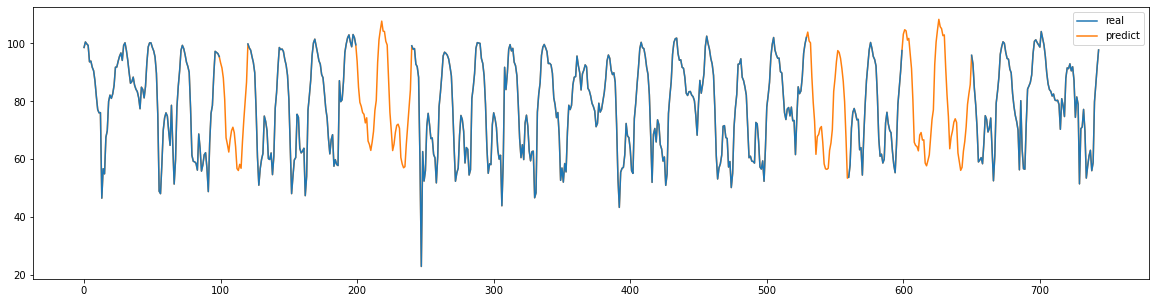

In [5]:
naomiIMP = NAMOIimputation("traffic_missing.csv",window_size=50, use_gpu = False)
naomiIMP.imputation(200)
naomiIMP.plot()

In [11]:
result_df = naomiIMP.df
result_numpy = naomiIMP.result

result_df.to_csv("result.csv")

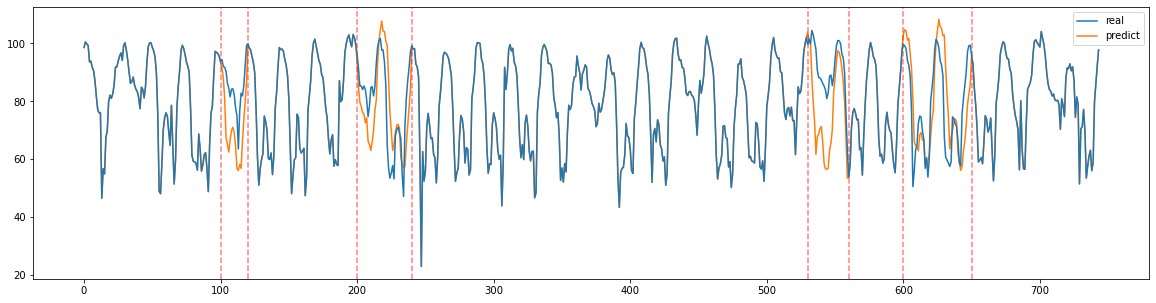

In [21]:
# compare with real value
import matplotlib.pyplot as plt
df_real = pd.read_csv("traffic.csv", encoding="CP949")

plt.figure(figsize=(20,5))
plt.plot(df_real["평균속도"], label="real", zorder=10)
plt.plot(naomiIMP.result, label="predict")

plt.axvline(x=100, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=120, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=200, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=240, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=530, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=560, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=600, color='r',linestyle='--', alpha=0.5)
plt.axvline(x=650, color='r',linestyle='--', alpha=0.5)

plt.legend()
plt.show()